**Analytics of a USA based company.
 Products: Bicycle, Clothing and Accessories sales and customer records utilizing Python libraries**

Source: DataQuest

Author: Adefolarinwa Ezekiel Gade

Tools: Pycharm, Excel.

In [1]:
#importing the python libraries
try:
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates

    print('Modules imported successfully')
except ImportError as error:
    print(f'{error.name} import failed')

Modules imported successfully


__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
**The Customer Data (Person, StateID, Province, Province Code, Country) provided below**

In [2]:
#importing the company's customer data.
df3 = pd.read_excel('Retail+Database.xlsx', sheet_name= 'Person_StateProvince')
df3.drop('rowguid', axis= 1, inplace= True)
df3.drop('ModifiedDate', axis= 1, inplace= True)
#displaying the data
df3.head(15)

,StateProvinceID,StateProvinceCode,Country,IsOnlyStateProvinceFlag,Name,TerritoryID
0,1,AB,Canada,0,Alberta,6.0
1,2,AK,United States,0,Alaska,1.0
2,3,AL,United States,0,Alabama,5.0
3,4,AR,United States,0,Arkansas,3.0
4,5,AS,American Samoa,-1,American Samoa,1.0
5,6,AZ,United States,0,Arizona,4.0
6,7,BC,Canada,0,British Columbia,6.0
7,8,BY,Germany,0,Bayern,8.0
8,9,CA,United States,0,California,4.0
9,10,CO,United States,0,Colorado,3.0


__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
Good, next is to check for missing values, if any that we have to clean/correct if not outside range.

In [3]:
df3.isnull().sum()
#The following shows that there is a missing value in the TerriroryID column.

StateProvinceID            0
StateProvinceCode          0
Country                    0
IsOnlyStateProvinceFlag    0
Name                       0
TerritoryID                1
dtype: int64

In [4]:
df3['TerritoryID'].isnull()
#It is obvious that row 13 is missing a value, check back at the data above, United Kingdom is missing a territory ID.
#We have to drop the row since it occurs only once and there is no provided UK ID lists to reference.

0      False
1      False
2      False
3      False
4      False
       ...  
176    False
177    False
178    False
179    False
180    False
Name: TerritoryID, Length: 181, dtype: bool

In [5]:
#Dropping the United Kingdom row since there is no reference provided
df3.dropna(axis = 0, how= 'any', inplace= True)

In [6]:
#Displaying the data structure to confirm the dropped column and get the data structure.
df3['Country'].value_counts()

Country
France                      96
United States               53
Canada                      13
Germany                      7
Australia                    5
American Samoa               1
Micronesia                   1
Marshall Islands             1
Northern Mariana Islands     1
Palau                        1
Virgin Islands, U.S.         1
Name: count, dtype: int64

The information provided above shows that France, United States of America and Canada have  the  highest consumer turn out rate.

In [7]:
#To reconfirm any missing value before we proceed
df3.isnull().sum()

StateProvinceID            0
StateProvinceCode          0
Country                    0
IsOnlyStateProvinceFlag    0
Name                       0
TerritoryID                0
dtype: int64

**Zero missing values, Let us  proceed with analytical plots to provide nterpretative data models.**
__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________

Text(0, 0.5, 'State Provinces')

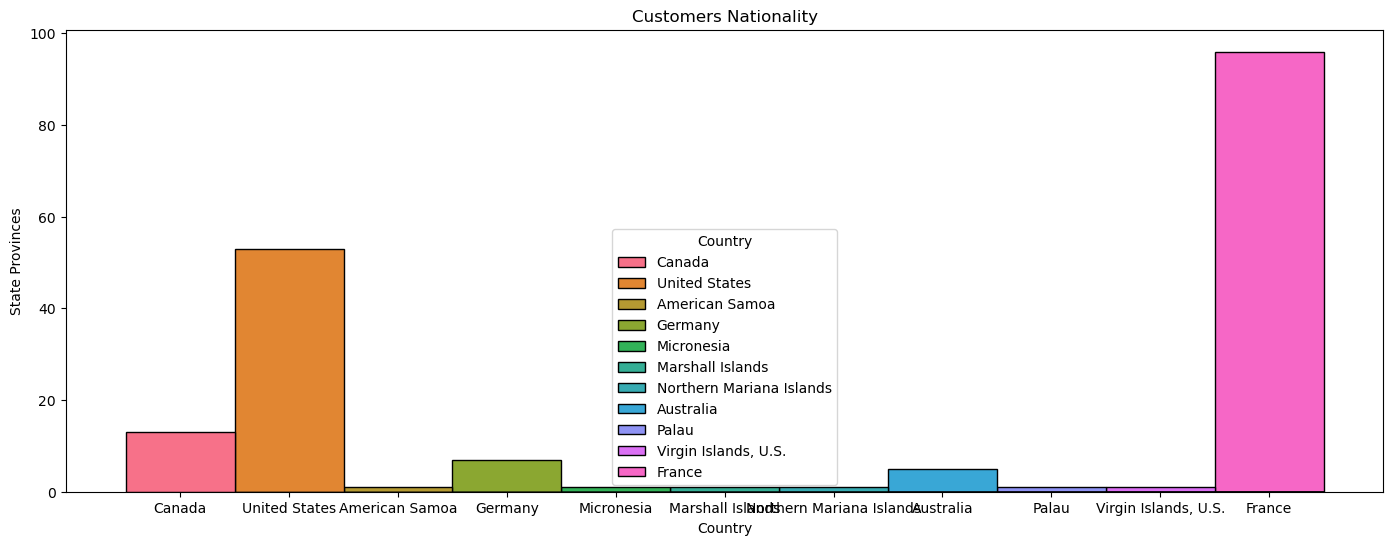

In [8]:
#Customers countries of origin histogram
plt.figure(figsize= (17,6))
custompal = sns.set_palette('husl', 10)
sns.histplot(x= 'Country', data= df3, hue= 'Country', palette= custompal, alpha= 1)
plt.title('Customers Nationality')
plt.ylabel('State Provinces')

In [9]:
plt.figure(figsize= (30,6))


<Figure size 3000x600 with 0 Axes>

<Figure size 3000x600 with 0 Axes>

Text(0.5, 0, 'State Provinces')

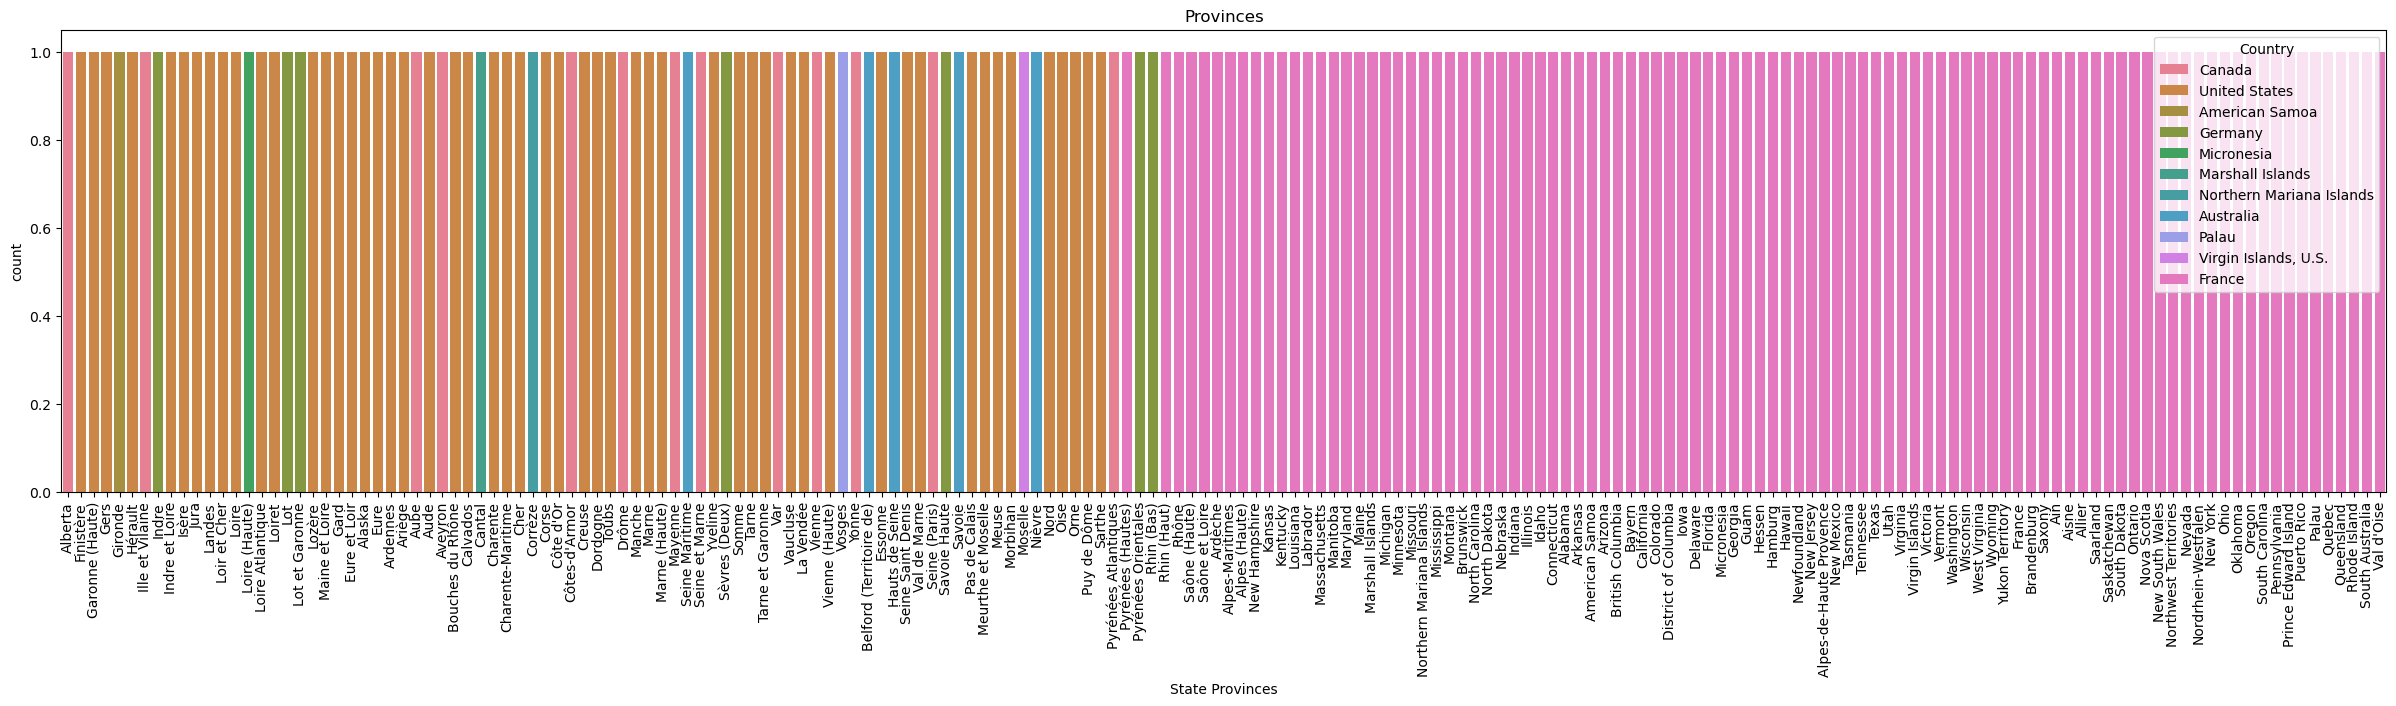

In [10]:
#Consumer States based on country classification.
plt.figure(figsize= (30,6))
custompal = sns.set_palette('husl', 10)
sns.countplot(x= 'Name', data= df3, hue= 'Country',palette= custompal, alpha= 1)
plt.title('Provinces')
df3['Name'].value_counts().plot(kind= 'bar',alpha=0)
plt.xlabel('State Provinces')

__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
**Sales Customers Database**

In [11]:
#Sales Customers Data Analytics
df6 = pd.read_excel(r'C:\Users\USERPC\PyCharmMiscProject\Retail+Database.xlsx', sheet_name= 'Sales_Customer')
df6.head(10)

,CustomerID,TerritoryID,AccountNumber,CustomerType,rowguid,ModifiedDate
0,1,1,AW00000001,S,{3F5AE95E-B87D-4AED-95B4-C3797AFCB74F},38273.468834
1,2,1,AW00000002,S,{E552F657-A9AF-4A7D-A645-C429D6E02491},38273.468834
2,3,4,AW00000003,S,{130774B1-DB21-4EF3-98C8-C104BCD6ED6D},38273.468834
3,4,4,AW00000004,S,{FF862851-1DAA-4044-BE7C-3E85583C054D},38273.468834
4,5,4,AW00000005,S,{83905BDC-6F5E-4F71-B162-C98DA069F38A},38273.468834
5,6,4,AW00000006,S,{1A92DF88-BFA2-467D-BD54-FCB9E647FDD7},38273.468834
6,7,1,AW00000007,S,{03E9273E-B193-448E-9823-FE0C44AEED78},38273.468834
7,8,5,AW00000008,S,{801368B1-4323-4BFA-8BEA-5B5B1E4BD4A0},38273.468834
8,9,5,AW00000009,S,{B900BB7F-23C3-481D-80DA-C49A5BD6F772},38273.468834
9,10,6,AW00000010,S,{CDB6698D-2FF1-4FBA-8F22-60AD1D11DABD},38273.468834


In [12]:
# Total consumer count
print(f'There are a total of 19,185 customers recorded during the period.')
df6.describe()

There are a total of 19,185 customers recorded during the period.


,CustomerID,TerritoryID,ModifiedDate
count,19185.000000,19185.000000,1.918500e+04
mean,19514.721762,5.859369,3.827347e+04
std,6431.378514,3.051089,1.123437e-08
min,1.000000,1.000000,3.827347e+04
25%,15095.000000,4.000000,3.827347e+04
50%,19891.000000,6.000000,3.827347e+04
75%,24687.000000,9.000000,3.827347e+04
max,29483.000000,10.000000,3.827347e+04


CustomerType
I    18484
S      701
Name: count, dtype: int64


Text(0.5, 1.0, 'Customer Type (Total: 19,185)')

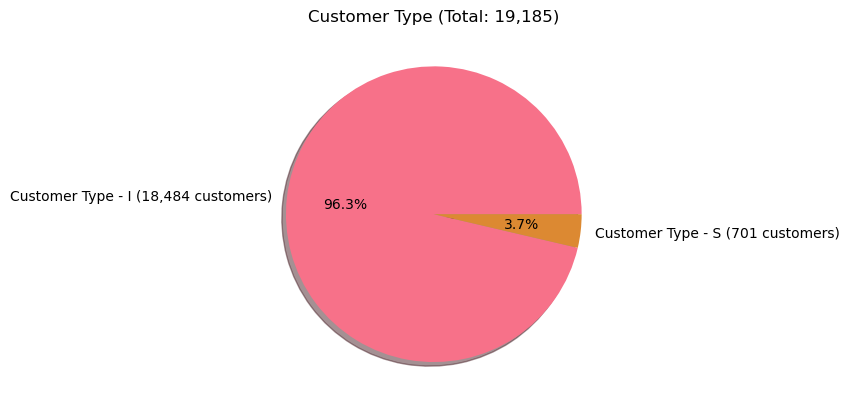

In [13]:
#Consumer type distribution
df6_customer_type = df6['CustomerType'].value_counts()
print(df6_customer_type)
plt.pie(df6_customer_type, autopct= '%.1f%%', labels= ('Customer Type - I (18,484 customers)', 'Customer Type - S (701 customers)'), shadow= True)
plt.title('Customer Type (Total: 19,185)')

Text(0.5, 1.0, 'Customer Territory ID Distribution')

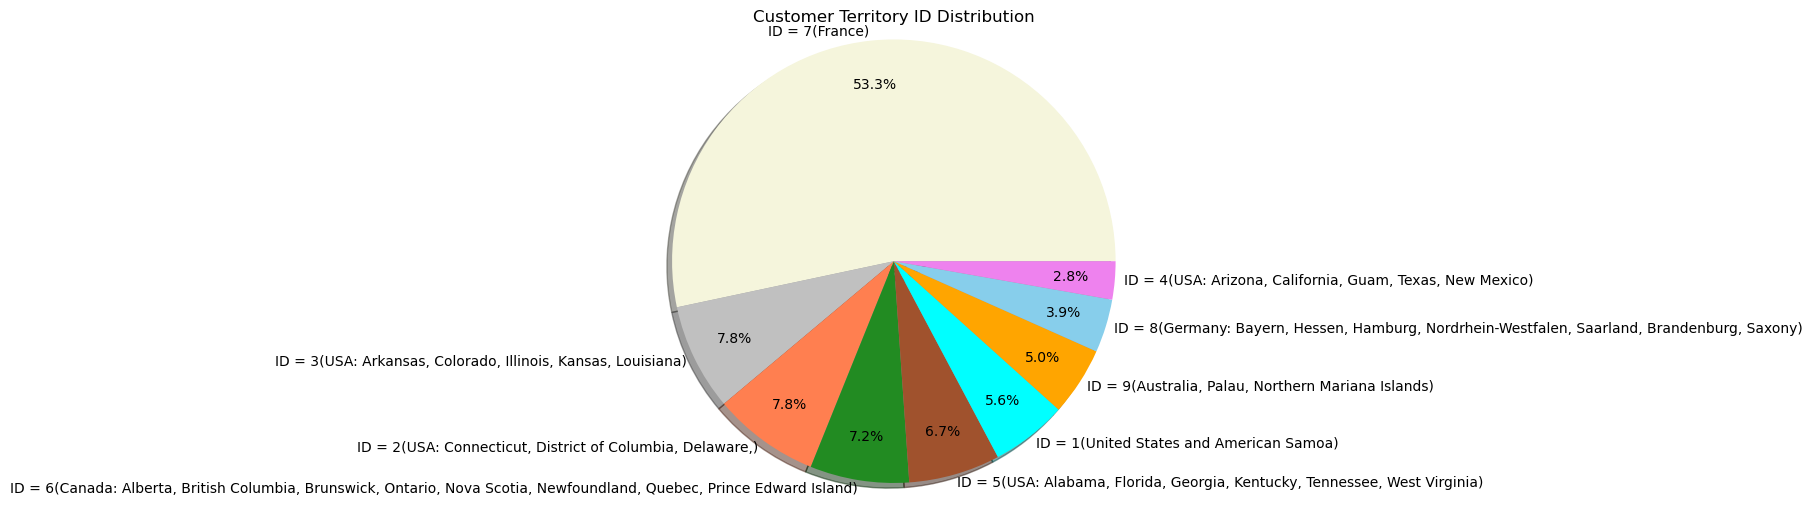

In [14]:
#Territory ID Distribution
plt.figure(figsize= (20,6))
Territory_ID = df3['TerritoryID'].value_counts()
plt.pie(Territory_ID,labeldistance= 1.04, autopct= '%.1f%%', shadow= True, radius= 1.2,pctdistance= 0.8, labels= ('ID = 7(France)', 'ID = 3(USA: Arkansas, Colorado, Illinois, Kansas, Louisiana)', 'ID = 2(USA: Connecticut, District of Columbia, Delaware,)', 'ID = 6(Canada: Alberta, British Columbia, Brunswick, Ontario, Nova Scotia, Newfoundland, Quebec, Prince Edward Island)', 'ID = 5(USA: Alabama, Florida, Georgia, Kentucky, Tennessee, West Virginia)', 'ID = 1(United States and American Samoa)', 'ID = 9(Australia, Palau, Northern Mariana Islands)', 'ID = 8(Germany: Bayern, Hessen, Hamburg, Nordrhein-Westfalen, Saarland, Brandenburg, Saxony)', 'ID = 4(USA: Arizona, California, Guam, Texas, New Mexico)'), colors= ('beige','silver','coral','forestgreen','sienna','cyan','orange','skyblue','violet'))
plt.title('Customer Territory ID Distribution')

__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________

**Next is the Production Category**


In [15]:
#importing the product category excel file
df4 = pd.read_excel('Retail+Database.xlsx', sheet_name= 'Production_Products')

#displaying the file
df4.head(10)

,ProductID,ProductCategory,Name,rowguid,ModifiedDate
0,1,Bikes,Mountain Bikes,{2D364ADE-264A-433C-B092-4FCBF3804E01},35947
1,2,Bikes,Road Bikes,{000310C0-BCC8-42C4-B0C3-45AE611AF06B},35947
2,3,Bikes,Touring Bikes,{02C5061D-ECDC-4274-B5F1-E91D76BC3F37},35947
3,4,Components,Handlebars,{3EF2C725-7135-4C85-9AE6-AE9A3BDD9283},35947
4,5,Components,Bottom Brackets,{A9E54089-8A1E-4CF5-8646-E3801F685934},35947
5,6,Components,Brakes,{D43BA4A3-EF0D-426B-90EB-4BE4547DD30C},35947
6,7,Components,Chains,{E93A7231-F16C-4B0F-8C41-C73FDEC62DA0},35947
7,8,Components,Cranksets,{4F644521-422B-4F19-974A-E3DF6102567E},35947
8,9,Components,Derailleurs,{1830D70C-AA2A-40C0-A271-5BA86F38F8BF},35947
9,10,Components,Forks,{B5F9BA42-B69B-4FDD-B2EC-57FB7B42E3CF},35947


In [16]:
#Checking for missing values
df4.isnull().sum()

ProductID          0
ProductCategory    0
Name               0
rowguid            0
ModifiedDate       0
dtype: int64

Text(0.5, 1.0, 'Product Category')

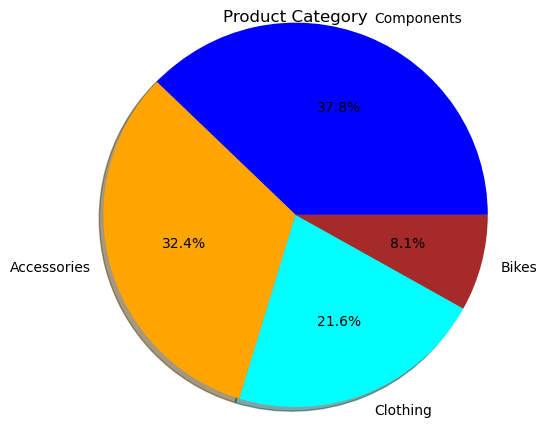

In [17]:
#Pie chart of the Production Category
df4values = df4['ProductCategory'].value_counts()
plt.pie(df4values, labels= ('Components','Accessories','Clothing','Bikes'), autopct= '%.1f%%', radius= 1.3, shadow= True, colors= ('blue','orange','cyan','brown'))
plt.title('Product Category')

Text(0.5, 0, 'Product Types')

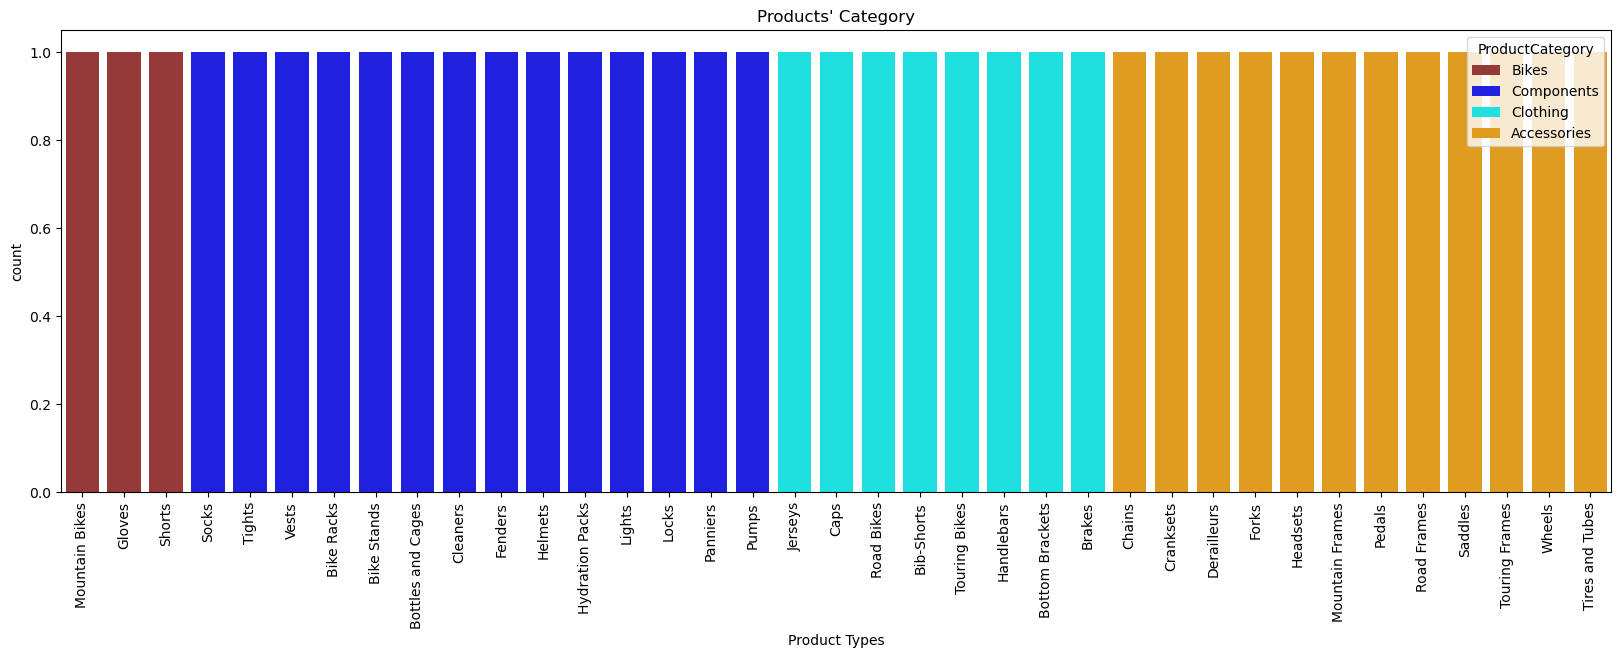

In [18]:
#Representation of the product subcategory
plt.figure(figsize= (20,6))
custompal2 = ('brown','blue','cyan','orange')
sns.countplot(x= 'Name', data= df4, hue= 'ProductCategory', palette= custompal2, alpha= 1)
df4['Name'].value_counts().plot(kind= 'bar', alpha= 0)
plt.title('Products\' Category')
plt.xlabel('Product Types')


__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
**Next is the Production SubCategory(Products category, product name)**

In [21]:
#Checking the data structure
df5.describe()

,ProductID,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,DaysToManufacture,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ModifiedDate
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,295.000000,295.000000,504.000000,98.000000,0.0,504.000000
mean,673.039683,-0.474206,-0.585317,535.150794,401.363095,258.602961,438.666250,1.103175,12.294915,37.444068,36860.140873,37693.989796,NaN,38057.417791
std,229.373142,0.499830,0.493157,374.112954,280.584715,461.632808,773.602843,1.492616,9.860135,34.025442,808.115670,167.462474,NaN,0.000071
min,1.000000,-1.000000,-1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,35947.000000,37437.000000,NaN,38057.417787
25%,447.750000,-1.000000,-1.000000,100.000000,75.000000,0.000000,0.000000,0.000000,2.000000,11.000000,35947.000000,37437.000000,NaN,38057.417787
50%,747.500000,0.000000,-1.000000,500.000000,375.000000,23.372200,49.990000,1.000000,12.000000,26.000000,37073.000000,37802.000000,NaN,38057.417787
75%,873.250000,0.000000,0.000000,1000.000000,750.000000,317.075825,564.990000,1.000000,17.000000,48.500000,37803.000000,37802.000000,NaN,38057.417787
max,999.000000,0.000000,0.000000,1000.000000,750.000000,2171.294200,3578.270000,4.000000,37.000000,128.000000,37803.000000,37802.000000,NaN,38057.419392


In [20]:
#Importing the production subcategory
df5 = pd.read_excel(r'C:\Users\USERPC\PyCharmMiscProject\Retail+Database.xlsx', sheet_name= 'Production_Subcategory')
df5.head(10)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},38057.417787
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},38057.417787
2,3,BB Ball Bearing,BE-2349,-1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},38057.417787
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},38057.417787
4,316,Blade,BL-2036,-1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{E73E9750-603B-4131-89F5-3DD15ED5FF80},38057.417787
5,317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0,0.0,...,NaN,L,NaN,NaN,NaN,35947,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},38057.417787
6,318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0,0.0,...,NaN,M,NaN,NaN,NaN,35947,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},38057.417787
7,319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},38057.417787
8,320,Chainring Bolts,CB-2903,0,0,Silver,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{7BE38E48-B7D6-4486-888E-F53C26735101},38057.417787
9,321,Chainring Nut,CN-6137,0,0,Silver,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,35947,NaN,NaN,{3314B1D7-EF69-4431-B6DD-DC75268BD5DF},38057.417787


The above table depicts multiple statistical analysis including minimum, average, maximum value of the standard and list price, while also showing the standard deviation, 25 - 75% percentile.

The columns with too many missing values are the ProductSubcategoryID, ProductionModeID, SellEndDate, DiscontinuedDate, which are basically unimportant to derive information.

Text(0.5, 0, 'Sub-products Types')

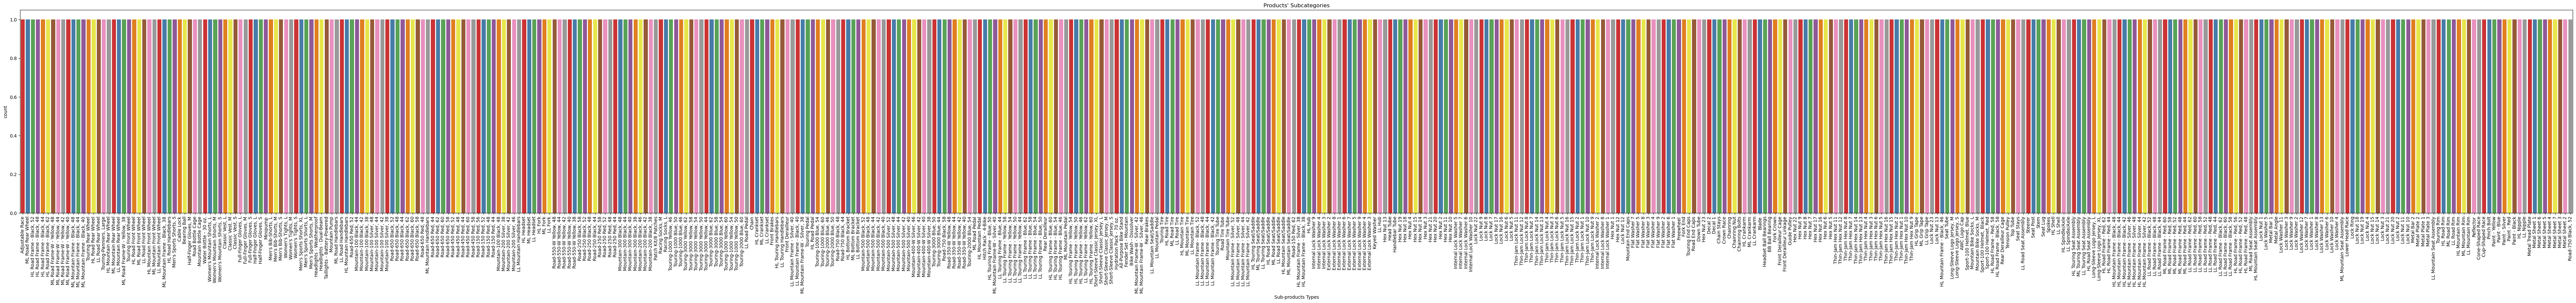

In [22]:
plt.figure(figsize= (100,8))
sns.countplot(x= 'Name', data= df5, hue='Name', legend= False ,alpha= 1, palette= 'Set1')
df5['Name'].value_counts().plot(kind= 'bar', alpha= 0)
plt.title('Products\' Subcategories')
plt.xlabel('Sub-products Types')

__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
**The other Production subcategory columns(Products name, list price and cost price)**

In [23]:
#Names of all products.
df5['Name'].value_counts()

Name
Adjustable Race              1
ML Road Rear Wheel           1
HL Road Frame - Black, 52    1
HL Road Frame - Black, 48    1
HL Road Frame - Black, 44    1
                            ..
Metal Sheet 4                1
Metal Sheet 7                1
Metal Sheet 3                1
Metal Sheet 2                1
Road-750 Black, 52           1
Name: count, Length: 504, dtype: int64

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
**The Sales Order Details Analytics**

In [24]:
df7 = pd.read_excel(r'C:\Users\USERPC\PyCharmMiscProject\Retail+Database.xlsx', sheet_name= 'Sales_SalesOrderDetail')
df7.head(10)

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.9940,0.0,2024.9940,{B207C96D-D9E6-402B-8470-2CC176C42283},37073
1,43659,2,4911-403C-98,3,777,1,2024.9940,0.0,6074.9820,{7ABB600D-1E77-41BE-9FE5-B9142CFC08FA},37073
2,43659,3,4911-403C-98,1,778,1,2024.9940,0.0,2024.9940,{475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F},37073
3,43659,4,4911-403C-98,1,771,1,2039.9940,0.0,2039.9940,{04C4DE91-5815-45D6-8670-F462719FBCE3},37073
4,43659,5,4911-403C-98,1,772,1,2039.9940,0.0,2039.9940,{5A74C7D2-E641-438E-A7AC-37BF23280301},37073
5,43659,6,4911-403C-98,2,773,1,2039.9940,0.0,4079.9880,{CE472532-A4C0-45BA-816E-EEFD3FD848B3},37073
6,43659,7,4911-403C-98,1,774,1,2039.9940,0.0,2039.9940,{80667840-F962-4EE3-96E0-AECA108E0D4F},37073
7,43659,8,4911-403C-98,3,714,1,28.8404,0.0,86.5212,{E9D54907-E7B7-4969-80D9-76BA69F8A836},37073
8,43659,9,4911-403C-98,1,716,1,28.8404,0.0,28.8404,{AA542630-BDCD-4CE5-89A0-C1BF82747725},37073
9,43659,10,4911-403C-98,6,709,1,5.7000,0.0,34.2000,{AC769034-3C2F-495C-A5A7-3B71CDB25D4E},37073


In [25]:
#Statistical analysis: The maximum, mean and average unit price and line total(swipe right to see more)
df7.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,ModifiedDate
count,25550.000000,25550.000000,25550.000000,25550.00000,25550.000000,25550.000000,25550.000000,25550.000000,25550.000000
mean,46543.600039,12775.500000,2.979139,772.87953,1.110763,836.814932,0.003575,1700.064096,37410.915695
std,1443.763027,7375.794025,2.651521,41.99055,0.754662,1014.873550,0.030399,2241.897445,152.967463
min,43659.000000,1.000000,1.000000,707.00000,1.000000,4.322100,0.000000,5.186500,37073.000000
25%,45329.000000,6388.250000,1.000000,748.00000,1.000000,53.994000,0.000000,184.122000,37288.000000
50%,46938.000000,12775.500000,2.000000,767.00000,1.000000,419.458900,0.000000,838.917800,37469.000000
75%,47706.000000,19162.750000,4.000000,796.00000,1.000000,1229.458900,0.000000,2443.350000,37530.000000
max,48857.000000,25550.000000,39.000000,863.00000,9.000000,3578.270000,0.350000,27055.760424,37629.000000


In [26]:
#Line total revenue
line_total_revenue = df7['LineTotal'].sum()
print(f'The line total revenue throughout the period: ${line_total_revenue :,.0f}')

The line total revenue throughout the period: $43,436,638


__________________________________________________________________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________________________________________________________________
**Analysis of the companies financial data which includes shipping method, subtotal, delivery payment,tax amount and total due.**

In [46]:
#Importing the finance data sheet
df8_finance = pd.read_excel(r'C:\Users\USERPC\PyCharmMiscProject\Retail+Database.xlsx', sheet_name= 'Sales_SalesOrderHeader')
df8_finance.head(10)

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate,ContactFirstName,ContactLastName
0,43659,1,37073,37085,37080,5,0,SO43659,PO522145787,10-4020-000676,...,NaN,24643.9362,1971.5149,616.0984,27231.5495,NaN,{79B65321-39CA-4115-9CBA-8FE0903E12E6},37080,James,Hendergart
1,43660,1,37073,37085,37080,5,0,SO43660,PO18850127500,10-4020-000117,...,NaN,1553.1035,124.2483,38.8276,1716.1794,NaN,{738DC42D-D03B-48A1-9822-F95A67EA7389},37080,Takiko,Collins
2,43661,1,37073,37085,37080,5,0,SO43661,PO18473189620,10-4020-000442,...,4.0,39422.1198,3153.7696,985.5530,43561.4424,NaN,{D91B9131-18A4-4A11-BC3A-90B6F53E9D74},37080,Jauna,Elson
3,43662,1,37073,37085,37080,5,0,SO43662,PO18444174044,10-4020-000227,...,4.0,34689.5578,2775.1646,867.2389,38331.9613,NaN,{4A1ECFC0-CC3A-4740-B028-1C50BB48711C},37080,Robin,McGuigan
4,43663,1,37073,37085,37080,5,0,SO43663,PO18009186470,10-4020-000510,...,NaN,503.3507,40.2681,12.5838,556.2026,NaN,{9B1E7A40-6AE0-4AD3-811C-A64951857C4B},37080,Jimmy,Bischoff
5,43664,1,37073,37085,37080,5,0,SO43664,PO16617121983,10-4020-000397,...,NaN,29312.4010,2344.9921,732.8100,32390.2031,NaN,{22A8A5DA-8C22-42AD-9241-839489B6EF0D},37080,Sandeep,Katyal
6,43665,1,37073,37085,37080,5,0,SO43665,PO16588191572,10-4020-000146,...,NaN,17199.2839,1375.9427,429.9821,19005.2087,NaN,{5602C304-853C-43D7-9E79-76E320D476CF},37080,Richard,Bready
7,43666,1,37073,37085,37080,5,0,SO43666,PO16008173883,10-4020-000511,...,NaN,6079.6842,486.3747,151.9921,6718.0510,NaN,{E2A90057-1366-4487-8A7E-8085845FF770},37080,Abraham,Swearengin
8,43667,1,37073,37085,37080,5,0,SO43667,PO15428132599,10-4020-000646,...,NaN,7326.5034,586.1203,183.1626,8095.7863,NaN,{86D5237D-432D-4B21-8ABC-671942F5789D},37080,Scott,MacDonald
9,43668,1,37073,37085,37080,5,0,SO43668,PO14732180295,10-4020-000514,...,4.0,43272.0670,3461.7654,1081.8017,47815.6341,NaN,{281CC355-D538-494E-9B44-461B36A826C6},37080,Ryan,Calafato


The ship method 1 makes up 72.2% while ship method 5 makes up 27.8% of the Freight Revenue
ShipMethodID
1    3753
5    1446
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x16e61f77ed0>,
 [Text(-0.7061325607681779, 0.8434315660579558, 'Ship Method ID - 1(3,753 times)'),
  Text(0.7061324334135465, -0.8434316726809964, 'Ship Method ID - 5(1,446 times)')],
 [Text(-0.3851632149644606, 0.46005358148615766, '72.2%'),
  Text(0.38516314549829805, -0.4600536396441798, '27.8%')])

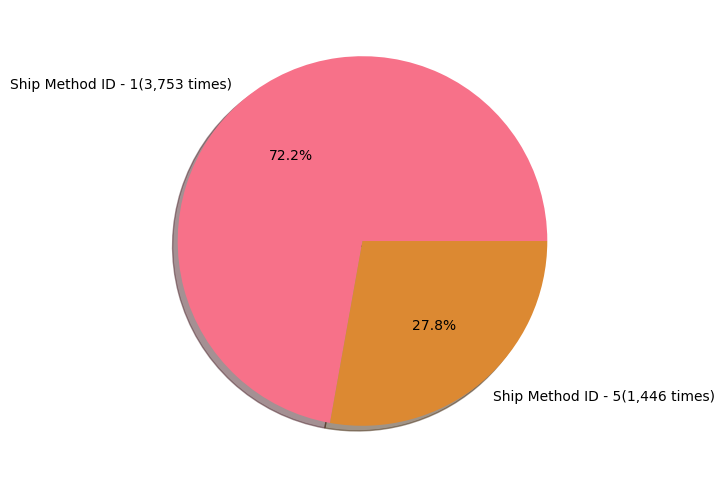

In [28]:
#Highlight of the different shipping methods.
print(f'The ship method 1 makes up 72.2% while ship method 5 makes up 27.8% of the Freight Revenue')
plt.figure(figsize= (20,6))
ship_method = df8_finance['ShipMethodID'].value_counts()
print(ship_method)
plt.pie(x= ship_method, data= df8_finance, labels= ('Ship Method ID - 1(3,753 times)','Ship Method ID - 5(1,446 times)'),autopct= '%.1f%%', shadow= True)

In [29]:
#Statistical analysis: The maximum, minimum and average  of the Sub-total amount, tax, delivery(freight), and the total due.
df8_finance.describe()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,CustomerID,ContactID,SalesPersonID,...,ShipToAddressID,ShipMethodID,CreditCardID,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,ModifiedDate
count,5199.000000,5199.0,5199.000000,5199.000000,5199.000000,5199.0,5199.000000,5199.000000,5199.000000,1446.000000,...,5199.000000,5199.000000,5034.000000,2353.000000,5199.000000,5199.000000,5199.000000,5199.000000,0.0,5199.000000
mean,46258.000000,1.0,37380.225813,37392.225813,37387.225813,5.0,-0.721870,13679.993268,7851.606078,278.903873,...,15143.624351,2.112522,9738.872467,3548.377391,9761.016321,780.881311,244.025439,10785.923070,NaN,37387.225813
std,1500.966355,0.0,159.406843,159.406843,159.406843,0.0,0.448121,9648.434815,6567.382962,3.520542,...,10024.034923,1.792484,5583.682363,1909.900676,20434.703741,1634.776297,510.867584,22580.347621,NaN,159.406843
min,43659.000000,1.0,37073.000000,37085.000000,37080.000000,5.0,-1.000000,1.000000,1.000000,268.000000,...,9.000000,1.000000,10.000000,2.000000,6.175000,0.494000,0.154400,6.823400,NaN,37080.000000
25%,44958.500000,1.0,37246.000000,37258.000000,37253.000000,5.0,-1.000000,631.000000,803.000000,276.000000,...,1051.000000,1.000000,4946.250000,1956.000000,2071.419600,165.713600,51.785500,2288.918700,NaN,37253.000000
50%,46258.000000,1.0,37397.000000,37409.000000,37404.000000,5.0,-1.000000,14167.000000,6947.000000,279.000000,...,16927.000000,1.000000,9795.500000,3716.000000,3578.270000,286.261600,89.456800,3953.988400,NaN,37404.000000
75%,47557.500000,1.0,37514.000000,37526.000000,37521.000000,5.0,0.000000,20849.000000,13732.000000,282.000000,...,23654.500000,5.000000,14582.250000,5223.000000,3578.270000,286.261600,89.456800,3953.988400,NaN,37521.000000
max,48857.000000,1.0,37629.000000,37641.000000,37636.000000,5.0,0.000000,29481.000000,19972.000000,287.000000,...,29878.000000,5.000000,19221.000000,6491.000000,187383.145200,14990.651600,4684.578600,207058.375400,NaN,37636.000000


In [57]:
import matplotlib.ticker as ticker
#Relationship between the sub-total, tax, delivery and the total due.
#Amount generated on the sold products(sub-total)
sub_total_revenue = df8_finance['SubTotal'].sum()
sub_total_average = df8_finance['SubTotal'].mean()
sub_total_max = df8_finance['SubTotal'].max()

#Amount generated on the tax paid by consumers
tax_amount_revenue = df8_finance['TaxAmt'].sum()
tax_amount_average = df8_finance['TaxAmt'].mean()
tax_amount_max = df8_finance['TaxAmt'].max()

#Amount generated on the delivery payments
freight_revenue = df8_finance['Freight'].sum()
freight_average = df8_finance['Freight'].mean()
freight_max = df8_finance['Freight'].max()

#Total revenue throughout all lines
total_revenue = df8_finance['TotalDue'].sum()
total_average = df8_finance['TotalDue'].mean()
total_max = df8_finance['TotalDue'].max()

#Outputting the values
print(f'The sub-total revenue: ${sub_total_revenue:,.0f}')
print(f'The sub-total average: ${sub_total_average:,.0f}')
print(f'The sub-total maximum: ${sub_total_max:,.0f}\n')

print(f'The tax revenue: ${tax_amount_revenue:,.0f}')
print(f'The tax average: ${tax_amount_average:,.0f}')
print(f'The tax maximum: ${tax_amount_max:,.0f}\n')

print(f'The freight revenue: ${freight_revenue:,.0f}')
print(f'The freight average: ${freight_average:,.0f}')
print(f'The freight maximum: ${freight_max:,.0f}\n')

print(f'The total revenue: ${total_revenue:,.0f}')
print(f'The average total order: ${total_average:,.0f}')
print(f'The maximum total order: ${total_max:,.0f}\n')
#Total revenue generated
revenue_data = pd.DataFrame({
    'Revenue Type' : ['Sub-Total','Tax Revenue','Freight Revenue','Total Revenue'],
    'Amount Generated' : [sub_total_revenue, tax_amount_revenue, freight_revenue, total_revenue]
})

#Average of the revenues
revenue_average = pd.DataFrame({
    'Payment Type' : ['Average Sub-Total Purchase','Average Tax Paid','Average Freight Paid','Average Total Purchase'],
    'Amount Paid' : [sub_total_average, tax_amount_average, freight_average, total_average]
})

#Maximum paid on each revenue
maximum_paid = pd.DataFrame({
    'Maximum Type' : ['Maximum Sub-total Purchase','Maximum Tax Paid','Maximum Freight Paid','Maximum Total Purchase'],
    'Maximum Paid' : [sub_total_max, tax_amount_max, freight_max, total_max]
})

highratedays = df8_finance.ModifiedDate.value_counts()
highratedays

The sub-total revenue: $50,747,524
The sub-total average: $9,761
The sub-total maximum: $187,383

The tax revenue: $4,059,802
The tax average: $781
The tax maximum: $14,991

The freight revenue: $1,268,688
The freight average: $244
The freight maximum: $4,685

The total revenue: $56,076,014
The average total order: $10,786
The maximum total order: $207,058



ModifiedDate
37476    148
37568    139
37598    125
37507    113
37384     97
        ... 
37315      1
37412      1
37196      1
37127      1
37170      1
Name: count, Length: 554, dtype: int64

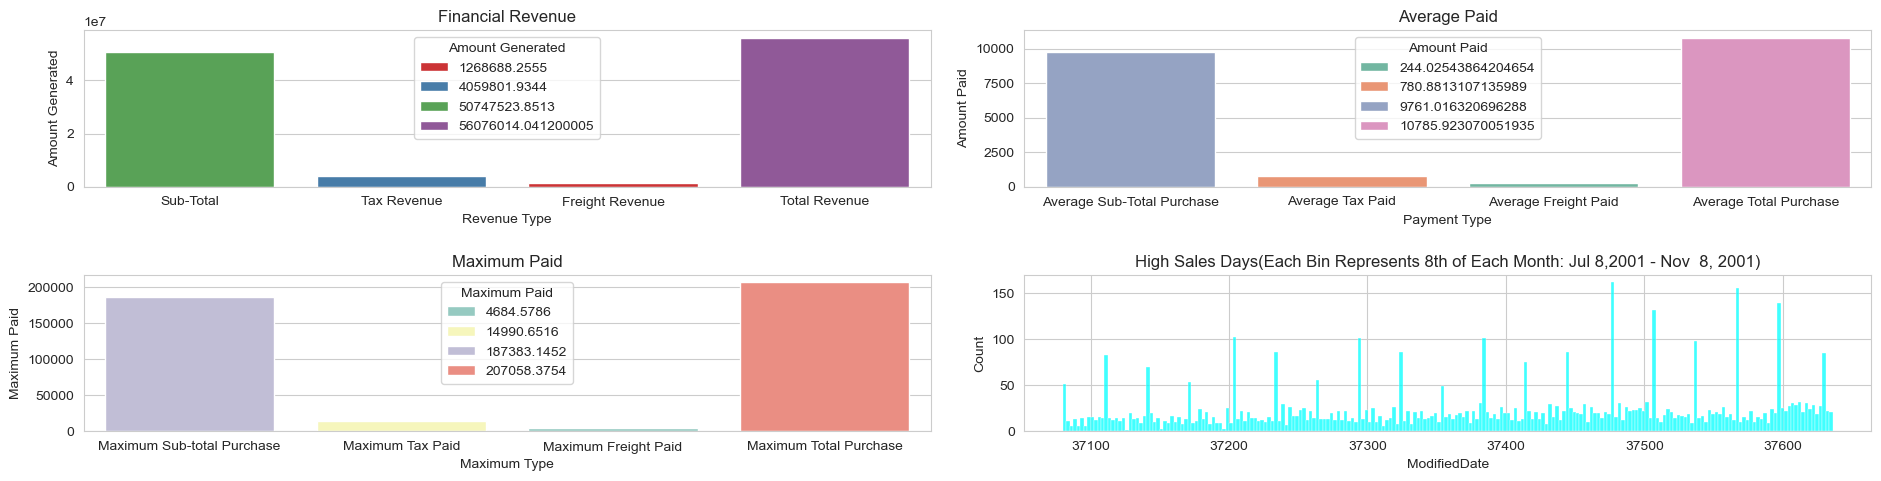

In [96]:
#Figures of the revenues that makes up the total revenue
fig, axes = plt.subplots(2, 2, figsize= (20,6))
sns.set_style('whitegrid')
axes[0,0].set_title('Financial Revenue')
sns.barplot(x= 'Revenue Type', y= 'Amount Generated', data = revenue_data, ax= axes[0,0], palette= 'Set1', hue= 'Amount Generated')

#Plotting the revenue averages
axes[0,1].set_title('Average Paid')
sns.barplot(x= 'Payment Type', y= 'Amount Paid', data = revenue_average, ax= axes[0,1], palette= 'Set2', hue= 'Amount Paid')

#Plotting the revenue maximum purchases
axes[1,0].set_title('Maximum Paid')
sns.barplot(x= 'Maximum Type', y= 'Maximum Paid', data= maximum_paid, ax= axes[1,0], palette= 'Set3', hue= 'Maximum Paid')
plt.tight_layout(pad=5, h_pad=2, w_pad=2)
#Plotting the heat days
axes[1,1].set_title('High Sales Days(Each Bin Represents 8th of Each Month: Jul 8,2001 - Nov  8, 2001)')
sns.histplot(x= 'ModifiedDate', data= df8_finance, ax= axes[1,1], color= 'cyan', binwidth= 2.5)

plt.tight_layout(pad=5, h_pad=2, w_pad=2)

Author: Adefolarinwa Ezekiel Gade